# Citation Management with Zotero

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://zotero.org/ width=700 height=350></iframe>')

or: Never format your own bibliography again!
---------------------------------------------

First, the useful things we will do today:

* Make a Zotero account (if you don't already have one)
* Install Zotero software from https://www.zotero.org/download/
 * For Firefox, you want Zotero 4.0 for Firefox and also the plugin for Word / OpenOffice.
 * For Safari or Chrome, you want the standalone client and the appropriate web connector.
* Add things to your Zotero library with the push of a button!
* Make a document, add references and citations without formatting a thing yourself.

And then, the fun things!

* Use Python to 'read' a Zotero library
* Pull the results into Graphviz and graph them!

This notebook includes the Python part of today's lesson.

Using Python to query Zotero
----------------------------

The first thing you need is the Zotero Python library. From a terminal command prompt, run

    pip install pyzotero
    
and then you're good to go.

In [2]:
from pyzotero import zotero

Let's use Python to look through someone's Zotero library! For this example I am using the public Zotero group library "Digital Humanities". You can also do this with your own private libraries, or closed group libraries if you're a member. To use the Python interface at all, you will need to generate an API key at https://www.zotero.org/settings/keys .

The Pyzotero API has some documentation here: http://pyzotero.readthedocs.org/en/latest/ 
although, like most technical documentation, it takes some getting used to.

In [3]:
zotero_group = zotero.Zotero( 30, "group", '9GLmvmZ1K1qGAz9QWcdlyf6L' )
things_in_library = zotero_group.items()
# See how many things we got back
print("We retrieved %d items" % len( things_in_library ))
# Look at one of the things
print(things_in_library[1])

We retrieved 25 items
{'version': 4486, 'data': {'extra': '00205 \nCited by 0000', 'language': '', 'collections': ['QTKPK7GB'], 'abstractNote': '', 'volume': '', 'numberOfVolumes': '', 'numPages': '728', 'publisher': 'Random House, Inc.', 'archiveLocation': '', 'tags': [], 'shortTitle': '', 'relations': {}, 'place': '', 'dateAdded': '2011-01-24T22:35:50Z', 'dateModified': '2015-04-08T01:34:12Z', 'libraryCatalog': 'Google Books', 'itemType': 'book', 'archive': '', 'callNumber': '0000', 'ISBN': '9780375420528', 'creators': [{'firstName': 'Mark Z.', 'lastName': 'Danielewski', 'creatorType': 'author'}], 'rights': '', 'series': '', 'version': 4486, 'accessDate': '', 'title': "Mark Z. Danielewski's House of leaves", 'seriesNumber': '', 'edition': '', 'url': '', 'date': '2000', 'key': '6KVEB6IP'}, 'library': {'id': 30, 'type': 'group', 'name': 'Digital Humanities', 'links': {'alternate': {'type': 'text/html', 'href': 'https://www.zotero.org/groups/digital_humanities'}}}, 'key': '6KVEB6IP', 'm

So we have 25 things in our list, and we can see that each of these 'things' is a JSON structure. That's fine, since we have learned about JSON. 

Back to that total number: we got 25 things by asking for the group's `items`. Does that mean there are 25 things in the library?

In [4]:
print("This group library has %d items in it" % zotero_group.num_items())

This group library has 541 items in it


Hmm. So how come we only got 25?

In order to protect itself against obnoxiously huge requests, the Zotero server limits the amount of information it will give out in response to any one request. You can ask for as many as 100 at a time by saying `zotero_group.items( limit=100 )`, but if you want more than that you have to keep making new requests until you get them all. The default built into pyzotero is to ask for 25 items at a time.

The way pyzotero handles larger libraries is a little intricate. One way to keep making new requests is to use the .follow() method - you can use this whenever you have just used a method that returns a list of items. follow() says "Okay, now give me the next chunk... and the next... and then next."

But as we're about to see, we have to figure out how to know when to stop.

In [5]:
our_items = zotero_group.items( limit=100 ); 
for i in range(1):   # Run the 'extend' method once
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 200 items so far


In [6]:
our_items = zotero_group.items( limit=100 ); 
for i in range(2):   # Run the 'extend' method twice
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 300 items so far


In [7]:
our_items = zotero_group.items( limit=100 ); 
for i in range(3):   # Run the 'extend' method three times
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 400 items so far


In [8]:
our_items = zotero_group.items( limit=100 ); 
for i in range(4):   # Run the 'extend' method four times
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 500 items so far


In [9]:
our_items = zotero_group.items( limit=100 ); 
for i in range(5):   # Run the 'extend' method five times
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 600 items so far


Well that's interesting - we saw before that the number of items in this library is supposedly 541, and now we have 600! 

That means that our first natural instinct for how to solve this problem - to divide num_items by 100 and figure out that way how many times we should iterate - won't work. What now? Where does this library end?

In [10]:
our_items = zotero_group.items( limit=100 ); 
for i in range(6):   # Run the 'extend' method six times
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

We have 698 items so far


Okay - 698 is not a multiple of 100, so this is probably the end of the line. What would happen if we just tested, to see if there is any more?

In [11]:
our_items = zotero_group.items( limit=100 ); 
for i in range(7):   # Run the 'extend' method seven times
    our_items.extend( zotero_group.follow() )
    
print("We have %d items so far" % len( our_items ))

ConnectionError: ('Connection aborted.', gaierror(8, 'nodename nor servname provided, or not known'))

Well! That's a nasty-looking error. And now we have the seemingly impossible situation that we have no way to know we're finished getting items out of Zotero until our code breaks on us.

As it happens, this sort of thing happens in Python all the time. We have to keep going until we get an error.

Crazy, you say? Ugly, you say? NO! Python expects you to try things until they fail, sometimes! I wasn't kidding about getting comfortable with failure.  Here's how we do it:

In [12]:
our_items = zotero_group.items( limit=100 ); 
try:            # This says we anticipate that an error might crop up.
    while (1):  # This says, keep doing the following until something goes wrong.
        our_items.extend( zotero_group.follow() )
except:         # This says, here is what we do if we get an error.
    pass        # This says, "ok thanks Python I was expecting that! Carry on."
    
print("We have %d items in total" % len( our_items ))

We have 698 items in total


This is called "exception handling" and is very useful for when you know (or suspect) something will stop working.

So now we have all our items - let's see who the authors, editors, etc. are! They are stored in the item record as a list of 'creators':

In [13]:
print(our_items[1]['data']['creators'])

[{'firstName': 'Mark Z.', 'lastName': 'Danielewski', 'creatorType': 'author'}]


So we get their names, and we get the info of whether they are authors or editors or translators or what. Let's make a graph and see who publishes about digital humanities!

First, just to make sure we have the hang of this, let's list all the creators we find.

In [14]:
for item in our_items:
    for creator in item['data']['creators']:
        print("%s %s was a(n) %s" % ( creator['firstName'], creator['lastName'], creator['creatorType'] ))

 National Center for Transgender Equality was a(n) author
Mark Z. Danielewski was a(n) author
Alcuin Blamires was a(n) author
Charles E Rosenberg was a(n) author
Simon Egenfeldt-Nielsen was a(n) author
Jonas Heide Smith was a(n) author
Susana Pajares Tosca was a(n) author
Patrik Svensson was a(n) author
Henry Nash Smith was a(n) author
Li Liu was a(n) author
Xingcan Chen was a(n) contributor
Robert Darnton was a(n) author
Claude Chapdelaine was a(n) contributor


KeyError: 'firstName'

Ooh huh, that's an ugly error. The `KeyError` means that we found a creator that doesn't have a `firstName`. We could use a `try/except` block like we did above, but we could also just check whether each creator has a first name before we try to list them. Let's see what's going on with this first-nameless creators by just printing out the whole structure when we encounter one.

In [15]:
for item in our_items:
    for creator in item['data']['creators']:
        if( 'firstName' in creator ):
            print("%s %s was a(n) %s" % ( creator['firstName'], creator['lastName'], creator['creatorType'] ))
        else:
            print(creator)

 National Center for Transgender Equality was a(n) author
Mark Z. Danielewski was a(n) author
Alcuin Blamires was a(n) author
Charles E Rosenberg was a(n) author
Simon Egenfeldt-Nielsen was a(n) author
Jonas Heide Smith was a(n) author
Susana Pajares Tosca was a(n) author
Patrik Svensson was a(n) author
Henry Nash Smith was a(n) author
Li Liu was a(n) author
Xingcan Chen was a(n) contributor
Robert Darnton was a(n) author
Claude Chapdelaine was a(n) contributor
{'name': 'Association des archéologues du Québec', 'creatorType': 'author'}
British History Online was a(n) author
Serge NOIRET was a(n) author
{'name': 'Amanda Visconti', 'creatorType': 'author'}
Scott Weingart was a(n) author
Trevor Owens was a(n) author
Laura Mandell was a(n) author
Mike Cosgrave was a(n) author
Anna Dowling was a(n) author
Lynn Harding was a(n) author
Róisín O'Brien was a(n) author
Olivia Rohan was a(n) author
Mark Tatz was a(n) author
Daniel J Cohen was a(n) author
Roy Rosenzweig was a(n) author
Luis O Góme

KeyError: 'creators'

Well we can see what's happening - some of the creators only have a `name`. We can cope with that. 

But look, we ran into, another key error! There is a record without any `creators`. So we have to handle that too. For now, let's just skip a record that has no creator.

In [16]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    for creator in item['data']['creators']:
        if( 'firstName' in creator ):
            print("%s %s was a(n) %s" % ( creator['firstName'], creator['lastName'], creator['creatorType'] ))
        else:
            print(creator)

 National Center for Transgender Equality was a(n) author
Mark Z. Danielewski was a(n) author
Alcuin Blamires was a(n) author
Charles E Rosenberg was a(n) author
Simon Egenfeldt-Nielsen was a(n) author
Jonas Heide Smith was a(n) author
Susana Pajares Tosca was a(n) author
Patrik Svensson was a(n) author
Henry Nash Smith was a(n) author
Li Liu was a(n) author
Xingcan Chen was a(n) contributor
Robert Darnton was a(n) author
Claude Chapdelaine was a(n) contributor
{'name': 'Association des archéologues du Québec', 'creatorType': 'author'}
British History Online was a(n) author
Serge NOIRET was a(n) author
{'name': 'Amanda Visconti', 'creatorType': 'author'}
Scott Weingart was a(n) author
Trevor Owens was a(n) author
Laura Mandell was a(n) author
Mike Cosgrave was a(n) author
Anna Dowling was a(n) author
Lynn Harding was a(n) author
Róisín O'Brien was a(n) author
Olivia Rohan was a(n) author
Mark Tatz was a(n) author
Daniel J Cohen was a(n) author
Roy Rosenzweig was a(n) author
Luis O Góme

Now we are error-free! Let's circle back to those first-nameless creators and handle them more nicely.

In [17]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    for creator in item['data']['creators']:
        full_name = ''
        if( 'firstName' in creator ):
            full_name = creator['firstName'] + ' ' + creator['lastName']
        else:
            full_name = creator['name']
        print("%s was a(n) %s" % ( full_name, creator['creatorType'] ))

 National Center for Transgender Equality was a(n) author
Mark Z. Danielewski was a(n) author
Alcuin Blamires was a(n) author
Charles E Rosenberg was a(n) author
Simon Egenfeldt-Nielsen was a(n) author
Jonas Heide Smith was a(n) author
Susana Pajares Tosca was a(n) author
Patrik Svensson was a(n) author
Henry Nash Smith was a(n) author
Li Liu was a(n) author
Xingcan Chen was a(n) contributor
Robert Darnton was a(n) author
Claude Chapdelaine was a(n) contributor
Association des archéologues du Québec was a(n) author
British History Online was a(n) author
Serge NOIRET was a(n) author
Amanda Visconti was a(n) author
Scott Weingart was a(n) author
Trevor Owens was a(n) author
Laura Mandell was a(n) author
Mike Cosgrave was a(n) author
Anna Dowling was a(n) author
Lynn Harding was a(n) author
Róisín O'Brien was a(n) author
Olivia Rohan was a(n) author
Mark Tatz was a(n) author
Daniel J Cohen was a(n) author
Roy Rosenzweig was a(n) author
Luis O Gómez was a(n) author
Śāntarakṣita was a(n) au

There we are! We can list our creators, which means we can graph them! We are going to use our good old `graphviz` Python library to create the graph.

In [18]:
import graphviz
%load_ext hierarchymagic

Now we can make our graph, which is undirected (otherwise we would have made a `graphviz.Digraph()`)

In [19]:
author_graph = graphviz.Graph()

and we can put in the data.

Here we want to have an edge between two authors whenever they worked together on a publication, whether as author or editor or contributor or what. Hang onto your hats through these loops!

In [20]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    # First, make a list of all the collaborators for this item.
    item_collaborators = []
    for creator in item['data']['creators']:
        full_name = ''
        if( 'firstName' in creator ):
            full_name = creator['firstName'] + ' ' + creator['lastName']
        else:
            full_name = creator['name']
        item_collaborators.append( full_name )
    # Second, add each pair of collaborators to the graph as an edge.
    while( len( item_collaborators ) > 1 ):
        me = item_collaborators.pop()
        for you in item_collaborators:
            author_graph.edge( me, you )


Now we could print out the author graph and copy/paste it into a new cell, or we could use the handy make_dotcell magic function that we used in the last class.

In [21]:
## Here is the function we need
def make_dotcell( thegraph, format="svg" ):
    cell_content = "%%dot " + "-f %s\n%s" % (format, thegraph.source)
    return cell_content


And then we use it...

In [22]:
%recall make_dotcell( author_graph )

Couldn't evaluate or find in history: make_dotcell( author_graph )


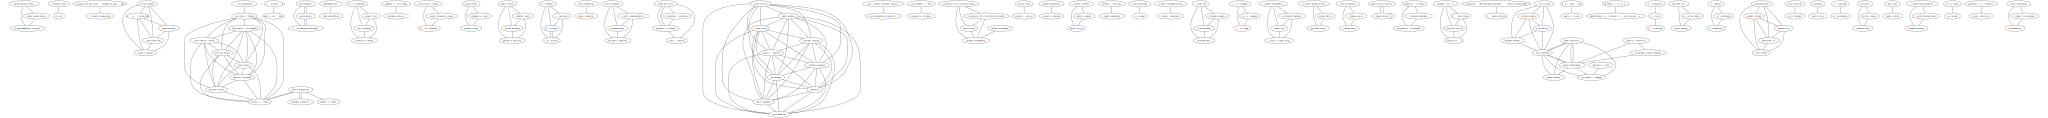

In [23]:
%%dot -f svg
graph {
		"Susana Pajares Tosca" -- "Simon Egenfeldt-Nielsen"
		"Susana Pajares Tosca" -- "Jonas Heide Smith"
		"Jonas Heide Smith" -- "Simon Egenfeldt-Nielsen"
		"Xingcan Chen" -- "Li Liu"
		"Association des archéologues du Québec" -- "Claude Chapdelaine"
		"Olivia Rohan" -- "Mike Cosgrave"
		"Olivia Rohan" -- "Anna Dowling"
		"Olivia Rohan" -- "Lynn Harding"
		"Olivia Rohan" -- "Róisín O'Brien"
		"Róisín O'Brien" -- "Mike Cosgrave"
		"Róisín O'Brien" -- "Anna Dowling"
		"Róisín O'Brien" -- "Lynn Harding"
		"Lynn Harding" -- "Mike Cosgrave"
		"Lynn Harding" -- "Anna Dowling"
		"Anna Dowling" -- "Mike Cosgrave"
		"Roy Rosenzweig" -- "Daniel J Cohen"
		"Śāntarakṣita" -- "Luis O Gómez"
		"Syd Bauman" -- "C. M Sperberg-McQueen"
		"Syd Bauman" -- "Lou Burnard"
		"Lou Burnard" -- "C. M Sperberg-McQueen"
		"Lou Burnard" -- "Syd Bauman"
		" @foundhistory" -- "Tom Scheinfeldt"
		"Lou Burnard" -- "C. M Sperberg-McQueen"
		"F. N. Robinson" -- "Geoffrey Chaucer"
		"F. N. Robinson" -- "Larry Benson"
		"F. N. Robinson" -- "Robert Pratt"
		"Robert Pratt" -- "Geoffrey Chaucer"
		"Robert Pratt" -- "Larry Benson"
		"Larry Benson" -- "Geoffrey Chaucer"
		"Thomas C. Stillinger" -- "Elizabeth Fowler"
		"Christian K. Zacher" -- "R. W. Hanning"
		"Christian K. Zacher" -- "James McMurrin Dean"
		"James McMurrin Dean" -- "R. W. Hanning"
		"Liam Frink" -- "Maxine Oland"
		"Liam Frink" -- "Siobhan M. Hart"
		"Siobhan M. Hart" -- "Maxine Oland"
		"Joan Griffin" -- "Michelle van Ryn"
		"Joan Griffin" -- "Diana Burgess"
		"Joan Griffin" -- "Jennifer Malat"
		"Jennifer Malat" -- "Michelle van Ryn"
		"Jennifer Malat" -- "Diana Burgess"
		"Diana Burgess" -- "Michelle van Ryn"
		"R. Grusin" -- "J.D. Bolter"
		"Tara McPherson" -- "Steve Anderson"
		"Keith Johnson" -- "Richard Anderson"
		"Keith Johnson" -- "Hannah Frost"
		"Keith Johnson" -- "Nancy Hoebelheinrich"
		"Nancy Hoebelheinrich" -- "Richard Anderson"
		"Nancy Hoebelheinrich" -- "Hannah Frost"
		"Hannah Frost" -- "Richard Anderson"
		"Frank McCown" -- "Michael L. Nelson"
		"Frank McCown" -- "Catherine C Marshall"
		"Catherine C Marshall" -- "Michael L. Nelson"
		"Noah Vawter" -- "Nick Montfort"
		"Noah Vawter" -- "Patsy Baudoin"
		"Noah Vawter" -- "John Bell"
		"Noah Vawter" -- "Ian Bogost"
		"Noah Vawter" -- "Jeremy Douglass"
		"Noah Vawter" -- "Mark C. Marino"
		"Noah Vawter" -- "Michael Mateas"
		"Noah Vawter" -- "Casey Reas"
		"Noah Vawter" -- "Mark Sample"
		"Mark Sample" -- "Nick Montfort"
		"Mark Sample" -- "Patsy Baudoin"
		"Mark Sample" -- "John Bell"
		"Mark Sample" -- "Ian Bogost"
		"Mark Sample" -- "Jeremy Douglass"
		"Mark Sample" -- "Mark C. Marino"
		"Mark Sample" -- "Michael Mateas"
		"Mark Sample" -- "Casey Reas"
		"Casey Reas" -- "Nick Montfort"
		"Casey Reas" -- "Patsy Baudoin"
		"Casey Reas" -- "John Bell"
		"Casey Reas" -- "Ian Bogost"
		"Casey Reas" -- "Jeremy Douglass"
		"Casey Reas" -- "Mark C. Marino"
		"Casey Reas" -- "Michael Mateas"
		"Michael Mateas" -- "Nick Montfort"
		"Michael Mateas" -- "Patsy Baudoin"
		"Michael Mateas" -- "John Bell"
		"Michael Mateas" -- "Ian Bogost"
		"Michael Mateas" -- "Jeremy Douglass"
		"Michael Mateas" -- "Mark C. Marino"
		"Mark C. Marino" -- "Nick Montfort"
		"Mark C. Marino" -- "Patsy Baudoin"
		"Mark C. Marino" -- "John Bell"
		"Mark C. Marino" -- "Ian Bogost"
		"Mark C. Marino" -- "Jeremy Douglass"
		"Jeremy Douglass" -- "Nick Montfort"
		"Jeremy Douglass" -- "Patsy Baudoin"
		"Jeremy Douglass" -- "John Bell"
		"Jeremy Douglass" -- "Ian Bogost"
		"Ian Bogost" -- "Nick Montfort"
		"Ian Bogost" -- "Patsy Baudoin"
		"Ian Bogost" -- "John Bell"
		"John Bell" -- "Nick Montfort"
		"John Bell" -- "Patsy Baudoin"
		"Patsy Baudoin" -- "Nick Montfort"
		" Los Alamos National Library" -- " Old Dominion University"
		"Christopher A. Pool" -- "Deborah L. Nichols"
		"University of California Press" -- "Jerome Rothenberg"
		"University of California Press" -- "Pierre Joris"
		"University of California Press" -- "University of California (System)"
		"University of California (System)" -- "Jerome Rothenberg"
		"University of California (System)" -- "Pierre Joris"
		"Pierre Joris" -- "Jerome Rothenberg"
		"Michael L. Nelson" -- "Frank McCown"
		"Michael L. Nelson" -- "Joan A. Smith"
		"Joan A. Smith" -- "Frank McCown"
		"Roy Rosenzweig" -- "Daniel J. Cohen"
		"Jiawei Han" -- "Harvey J. Miller"
		"Jeanne Hamming" -- "Helen J. Burgess"
		"Andrew Kenyon" -- "Peter Hirtle"
		"Andrew Kenyon" -- "Emily Hudson"
		"Emily Hudson" -- "Peter Hirtle"
		"Jerome J. McGann" -- "James Soderholm"
		"Nate Schweber" -- "Al Baker"
		"Diane Goldenberg-Hart" -- "Joan K. Lippincott"
		"Archie Tse" -- "Haeyoun Park"
		"Archie Tse" -- "Alan McLean"
		"Archie Tse" -- "Graham Roberts"
		"Graham Roberts" -- "Haeyoun Park"
		"Graham Roberts" -- "Alan McLean"
		"Alan McLean" -- "Haeyoun Park"
		"A. L. Vaughan" -- "C. H. Epps"
		"A. L. Vaughan" -- "D. G. Johnson"
		"D. G. Johnson" -- "C. H. Epps"
		"Andrea Scharnhorst" -- "Almila Akdag Salah"
		"Andrea Scharnhorst" -- "Cheng Gao"
		"Andrea Scharnhorst" -- "Krzysztof Suchecki"
		"Krzysztof Suchecki" -- "Almila Akdag Salah"
		"Krzysztof Suchecki" -- "Cheng Gao"
		"Cheng Gao" -- "Almila Akdag Salah"
		"Giorgio Tavano Blessi" -- "Pierluigi Sacco"
		"Giorgio Tavano Blessi" -- "Guido Ferilli"
		"Guido Ferilli" -- "Pierluigi Sacco"
		"Amy Bruckman" -- "Andrea Forte"
		"Amy Bruckman" -- "Vanessa Larco"
		"Vanessa Larco" -- "Andrea Forte"
		"Maria Pia Di Bella" -- "James Elkins"
		"Maria Pia Di Bella" -- "James Elkins"
		"James Elkins" -- "James Elkins"
		"James R. Allison" -- "Richard H. Wilshusen"
		"James R. Allison" -- "Gregson Schachner"
		"Gregson Schachner" -- "Richard H. Wilshusen"
		" Wagner, Gert G." -- "Adrian Duşa"
		" Wagner, Gert G." -- "Dietrich Nelle"
		" Wagner, Gert G." -- "Günter Stock"
		"Günter Stock" -- "Adrian Duşa"
		"Günter Stock" -- "Dietrich Nelle"
		"Dietrich Nelle" -- "Adrian Duşa"
		" Bibliothèque nationale (France). Éditeur scientifique" -- "Léopold Delisle"
		"Alex Garnett" -- "Ray Siemens"
		"Alex Garnett" -- "Meagan Timney"
		"Alex Garnett" -- "Cara Leitch"
		"Alex Garnett" -- "Corina Koolen"
		"Corina Koolen" -- "Ray Siemens"
		"Corina Koolen" -- "Meagan Timney"
		"Corina Koolen" -- "Cara Leitch"
		"Cara Leitch" -- "Ray Siemens"
		"Cara Leitch" -- "Meagan Timney"
		"Meagan Timney" -- "Ray Siemens"
		"Roy Rosenzweig" -- "Daniel J. Cohen"
		"S. B. Adonʹeva" -- "Laura J. Olson"
		"Bishop, A. P. et al." -- "Marchionini, G., Plaisant, C., & Komlodi, A."
		"G. Roncaglia" -- "F. Ciotti"
		"Alan MacEachern" -- "William J. Turkel"
		"Matthew Loy" -- "Nancy Maron"
		"Matthew Loy" -- "K. Kirby Smith"
		"K. Kirby Smith" -- "Nancy Maron"
		"John Unsworth" -- "William G. Thomas"
		"John Unsworth" -- "Susan Schreibman"
		"John Unsworth" -- "Ray Siemens"
		"Ray Siemens" -- "William G. Thomas"
		"Ray Siemens" -- "Susan Schreibman"
		"Susan Schreibman" -- "William G. Thomas"
		"Jeffrey Robinson" -- "Jerome Rothenberg"
		"F. Tomasi" -- "T. Numerico"
		"F. Tomasi" -- "D. Fiormonte"
		"D. Fiormonte" -- "T. Numerico"
		"Roy Rosenzweig" -- "Michael O'Malley"
		"Dursun Delen" -- "Gary Miner"
		"Dursun Delen" -- "John Elder IV"
		"Dursun Delen" -- "Thomas Hill"
		"Dursun Delen" -- "Robert Nisbet"
		"Robert Nisbet" -- "Gary Miner"
		"Robert Nisbet" -- "John Elder IV"
		"Robert Nisbet" -- "Thomas Hill"
		"Thomas Hill" -- "Gary Miner"
		"Thomas Hill" -- "John Elder IV"
		"John Elder IV" -- "Gary Miner"
		"Katie Shilton" -- "Lilly Nguyen"
		"B. Gennaro" -- "J.D. Bolter"
		"B. Gennaro" -- "R. Grusin"
		"B. Gennaro" -- "A. Marinelli"
		"A. Marinelli" -- "J.D. Bolter"
		"A. Marinelli" -- "R. Grusin"
		"R. Grusin" -- "J.D. Bolter"
		" Demand" -- "Fabio Ciracì"
		"F. Ciotti" -- "G. Gigliozzi"
		"V. Marangi" -- "R. Baroncelli"
		"John M. Unsworth" -- "Susan Schreibman"
		"John M. Unsworth" -- "Raymond George Siemens"
		"Raymond George Siemens" -- "Susan Schreibman"
		"Jo Walsh" -- "Schuyler Erle"
		"Jo Walsh" -- "Rich Gibson"
		"Rich Gibson" -- "Schuyler Erle"
		"Seb Chan" -- "Susan Cairns"
		"John Unsworth" -- "Susan Hockey"
		"John Unsworth" -- "Susan Schreibman"
		"John Unsworth" -- "Ray Siemens"
		"Ray Siemens" -- "Susan Hockey"
		"Ray Siemens" -- "Susan Schreibman"
		"Susan Schreibman" -- "Susan Hockey"
		"George Michalopoulos" -- "Kenneth Dyson"
		"George Michalopoulos" -- "Kevin Featherstone"
		"Kevin Featherstone" -- "Kenneth Dyson"
		"W. R Trask" -- "M. Eliade"
		"Matthew J. L. Connolly" -- " Davis, Philip M."
		"William J. Turkel" -- "Daniel J. Cohen"
		"William J. Turkel" -- "Michael Frisch"
		"William J. Turkel" -- "Patrick Gallagher"
		"William J. Turkel" -- "Steve Mintz"
		"William J. Turkel" -- "Kirsten Sword"
		"William J. Turkel" -- "Amy Murrell Taylor"
		"William J. Turkel" -- "William G. III Thomas"
		"William G. III Thomas" -- "Daniel J. Cohen"
		"William G. III Thomas" -- "Michael Frisch"
		"William G. III Thomas" -- "Patrick Gallagher"
		"William G. III Thomas" -- "Steve Mintz"
		"William G. III Thomas" -- "Kirsten Sword"
		"William G. III Thomas" -- "Amy Murrell Taylor"
		"Amy Murrell Taylor" -- "Daniel J. Cohen"
		"Amy Murrell Taylor" -- "Michael Frisch"
		"Amy Murrell Taylor" -- "Patrick Gallagher"
		"Amy Murrell Taylor" -- "Steve Mintz"
		"Amy Murrell Taylor" -- "Kirsten Sword"
		"Kirsten Sword" -- "Daniel J. Cohen"
		"Kirsten Sword" -- "Michael Frisch"
		"Kirsten Sword" -- "Patrick Gallagher"
		"Kirsten Sword" -- "Steve Mintz"
		"Steve Mintz" -- "Daniel J. Cohen"
		"Steve Mintz" -- "Michael Frisch"
		"Steve Mintz" -- "Patrick Gallagher"
		"Patrick Gallagher" -- "Daniel J. Cohen"
		"Patrick Gallagher" -- "Michael Frisch"
		"Michael Frisch" -- "Daniel J. Cohen"
		"Edward L. Ayers" -- "William G. Thomas"
		"Roy Rosenzweig" -- "Michael O'Malley"
		"Dave Weissman" -- "Raymond Lo"
		"Dave Weissman" -- "Guhan Viswanathan"
		"Guhan Viswanathan" -- "Raymond Lo"
}